# Average images and subtract background

--> V0: Dev April 6, 2018, Do average (or sumup ) images and subtract background

In [2]:
%matplotlib notebook
from pySMI.smi_libs import *
from pySMI.smi_package import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

from databroker import Broker
db = Broker.named('smi')

In [14]:
%run ~/pySMI/pySMI/smi_generic_functions.py

# Setup

In [4]:
beam_x = 97.0  #Need to be corrected
beam_y = 1316.0   #1475 - 159

energy = 16.0 # 2.484 #keV
start_angle = 4.5
phi_spacing= 4.0


In [5]:
wavelength_A =12.39842/energy
sam_det = 0.275 #in meters
dq = 4*np.pi/wavelength_A  * (172/1e6/sam_det)

calibration = CalibrationGonio(wavelength_A= wavelength_A) # 20.0 keV
calibration.set_image_size(195, height=1475) # Pilatus300kW vertical
#calibration.set_image_size(1475, height=195) # Pilatus300kW horizontal
calibration.set_pixel_size(pixel_size_um=172.0)
calibration.set_beam_position(beam_x,  beam_y )
calibration.set_distance( sam_det )
calibration.set_angles(det_phi_g=0., det_theta_g=0., )
print('ratio Dw = {:.3f}'.format(calibration.get_ratioDw()))
mask_dir = '/GPFS/xf12id1/analysis/commissioning/masks/'
mask = Mask(mask_dir+'Pilatus300kWh_main_gaps-mask.png')
#mask.load('./Pilatus300kWh_current-mask.png')
mask.load(mask_dir+'Pilatus300kWh_current-mask.png')

ratio Dw = 8.199


# Define Cycle &proposal_id here

In [6]:
CYCLE='2018_1'
proposal_id =  '302728'

In [7]:
#inDir = '/GPFS/xf12id1/data/300KW/images/users/%s/'%proposal_id
inDir = '/GPFS/xf12id1/data/1M/images/users/%s/'%proposal_id

fp = get_base_all_filenames(inDir,base_filename_cut_length=-12-3 )
print('We found %s samples in %s folder.' %(len( list( fp.keys() ) ), inDir ) )

We found 59 samples in /GPFS/xf12id1/data/1M/images/users/302728/ folder.


In [8]:
for k in list(fp.keys()):
    print(k)

test_test_
POPC352_water_
POPC352_C_third_
POPC352_C_half_
POPC352_C_full_
POPC352_B_third_
POPC352_B_half_
POPC352_B_full_
POPC352_A_third_
POPC352_A_half_
POPC352_A_full_
POPC352_8.3m_water_
POPC352_8.3m_C_third_
POPC352_8.3m_C_half_
POPC352_8.3m_C_full_
POPC352_8.3m_B_third_
POPC352_8.3m_B_half_
POPC352_8.3m_B_full_
POPC352_8.3m_A_third_
POPC352_8.3m_A_half_
POPC352_8.3m_A_full_
DOPC433c_8.3m_C_third_
DOPC433c_8.3m_C_half_
DOPC433c_8.3m_C_full_
DOPC433c_8.3m_B_third_
DOPC433c_8.3m_B_half_
DOPC433c_8.3m_B_full_
DOPC433c_8.3m_A_third_
DOPC433c_8.3m_A_half_
DOPC433c_8.3m_A_full_
DOPC433b_8.3m_C_third_
DOPC433b_8.3m_C_half_
DOPC433b_8.3m_C_full_
DOPC433b_8.3m_B_third_
DOPC433b_8.3m_B_half_
DOPC433b_8.3m_B_full_
DOPC433b_8.3m_A_third_
DOPC433b_8.3m_A_half_
DOPC433b_8.3m_A_full_
DOPC433a_8.3m_C_third_
DOPC433a_8.3m_C_half_
DOPC433a_8.3m_C_full_
DOPC433a_8.3m_B_third_
DOPC433a_8.3m_B_half_
DOPC433a_8.3m_B_full_
DOPC433a_8.3m_A_third_
DOPC433a_8.3m_A_half_
DOPC433a_8.3m_A_full_
DOPC433_8.3m

## Give a background and sample name here

In [15]:
bk = 'POPC352_8.3m_water_'
sam =   'DOPC433c_8.3m_A_third_'



In [18]:
d =  get_data_sub_bkg(  sam, bk, fp, scale=1, opt='avg')  #for avg
#d =  get_data_sub_bkg(  sam, bk, fp, scale=1, opt='sum')  #for sum

There will be 4 files to be averaged.
There will be 21 files to be averaged.


<IPython.core.display.Javascript object>


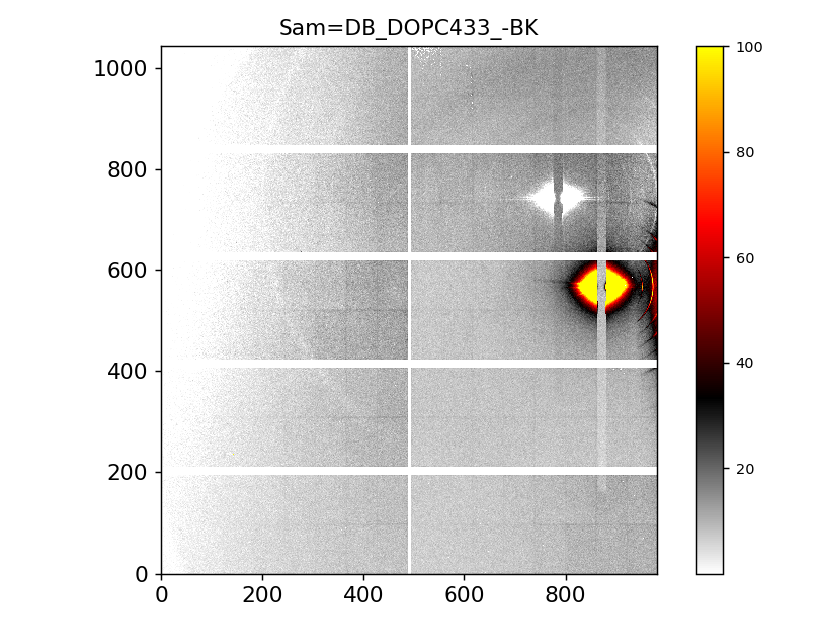

In [20]:
show_img ( d, vmin=1e-4, vmax=1e2, aspect=1, show_colorbar= True, cmap=cmap_albula, image_name='Sam=%s-BK'%k  )